In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  


# PivotPy

> A Python Processing Tool for Vasp Input/Output. A CLI is available in Powershell, see [Vasp2Visual](https://github.com/massgh/Vasp2Visual).

## Install
`pip install pivotpy`

## How to use
- [Read Function References](functions.md)
- See [Full Documentation](https://massgh.github.io/pivotpy/).
- For CLI, use [Vasp2Visual](https://github.com/massgh/Vasp2Visual).
- Run in Azure [![Run in Azure](https://notebooks.azure.com/launch.png)](https://testazurenotebooks-massaz.notebooks.azure.com/j/notebooks/index.ipynb)

# New: Ipywidgets-based GUI
See GIF here:
![GIF](widget.gif) 

- The code at end is used below to rebuild dataframe which can be use in many ways such as generating latex table. The matplotlib code is used to generate publication quality figure.

In [ ]:
from IPython.display import Markdown
import pivotpy as pp
paths = ['e:/Research/graphene_example/ISPIN_1/bands/DOS/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_1/bands/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_1/dos/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/dos/sigm0_01/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/dos/vasprun.xml',
         'e:/Research/graphene_example/vasprun.xml']
df = pp.generate_summary(paths_list=paths)
print(df.caption)
Markdown(df.data.to_markdown())

Root Path: e:/Research/graphene_example/


|    | sys   |       V |         a |         b |        c |      VBM |      CBM |   so_max |   so_min | rel_path             |   E_gap |
|---:|:------|--------:|----------:|----------:|---------:|---------:|---------:|---------:|---------:|:---------------------|--------:|
|  0 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 | nan      | nan      |      nan |      nan | ISPIN_1/bands/DOS    | nan     |
|  1 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 |  -2.7733 |  -2.7733 |      nan |      nan | ISPIN_1/bands        | nan     |
|  2 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 | -12.7211 |  -5.2581 |      nan |      nan | ISPIN_1/dos          |   7.463 |
|  3 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 | -12.7211 |  -5.2581 |      nan |      nan | ISPIN_2/bands        |   7.463 |
|  4 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 | nan      | nan      |      nan |      nan | ISPIN_2/dos/sigm0_01 | nan     |
|  5 | nan   | nan     | nan       | nan       | nan      | nan      | nan      |      nan |      nan | ISPIN_2/dos          | nan     |
|  6 | C2    | 105.493 |   2.46803 |   2.46803 |  19.9983 |  -3.7816 |  -1.7516 |      nan |      nan | nan                  |   2.03  |

In [ ]:
print(df.data[:2].to_latex())

\begin{tabular}{llrrrrrrrrlr}
\toprule
{} & sys &          V &        a &        b &         c &     VBM &     CBM &  so\_max &  so\_min &           rel\_path &  E\_gap \\
\midrule
0 &  C2 &  105.49325 &  2.46803 &  2.46803 &  19.99829 &     NaN &     NaN &     NaN &     NaN &  ISPIN\_1/bands/DOS &    NaN \\
1 &  C2 &  105.49325 &  2.46803 &  2.46803 &  19.99829 & -2.7733 & -2.7733 &     NaN &     NaN &      ISPIN\_1/bands &    NaN \\
\bottomrule
\end{tabular}



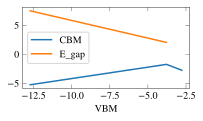

In [ ]:
ax = pp.init_figure(figsize=(3,1.5))
_ = df.data.sort_values('VBM').plot(ax=ax,x = 'VBM',y=['CBM','E_gap'])

In [ ]:
import os 
os.chdir('E:/Research/graphene_example/ISPIN_1/bands')
xml_data=pp.read_asxml()
vr=pp.export_vasprun(elim=[-5,5])
vr

Data(
    sys_info = Data(
        SYSTEM = C2
        NION = 2
        TypeION = 1
        ElemName = ['C']
        E_Fermi = -3.3501
        fields = ['s', 'py', 'pz', 'px', 'dxy', 'dyz', 'dz2', 'dxz', 'x2-y2']
        incar = Data(
            SYSTEM = C2
            PREC = high
            ALGO = N
            LSORBIT = T
            NELMIN = 7
            ISMEAR = 0
            SIGMA = 0.10000000
            LORBIT = 11
            GGA = PS
        )
        ElemIndex = [0, 2]
        ISPIN = 1
    )
    dim_info = Data(
        ⇅ = Each of SpinUp/SpinDown Arrays
        kpoints = (NKPTS,3)
        kpath = (NKPTS,1)
        bands = ⇅(NKPTS,NBANDS)
        dos = ⇅(grid_size,3)
        pro_dos = ⇅(NION,grid_size,en+pro_fields)
        pro_bands = ⇅(NION,NKPTS,NBANDS,pro_fields)
    )
    kpoints = <ndarray:shape=(90, 3)>
    kpath = <list:len=90>
    bands = Data(
        E_Fermi = -3.3501
        ISPIN = 1
        NBANDS = 21
        evals = <ndarray:shape=(90, 21)>
    )
    tdos 

## Matplotlib's static plots

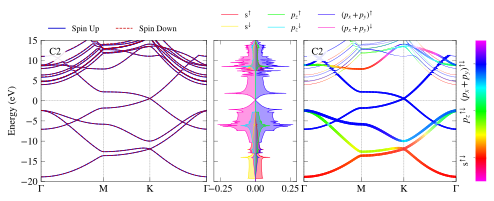

In [ ]:
#collapse_input
import pivotpy as pp 
import matplotlib.pyplot as plt 
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml')
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml')
axs=pp.init_figure(ncols=3,widths=[2,1,2.2],sharey=True,wspace=0.05,figsize=(8,2.6))
elements=[0,0,[0,1]]
orbs=[[0],[1],[2,3]]
labels=['s','$p_z$','$(p_x+p_y)$']
ti_cks=dict(xt_indices=[0,30,60,-1],xt_labels=['Γ','M','K','Γ'])
args_dict=dict(elements=elements,orbs=orbs,labels=labels,elim=[-20,15])
pp.quick_bplot(path_evr=vr1,ax=axs[0],**ti_cks,elim=[-20,15])
lg_k={'ncol': 3}
pp.quick_dos_lines(path_evr=vr2,ax=axs[1],vertical=True,spin='both',include_dos='pdos',**args_dict,legend_kwargs=lg_k)
pp.quick_rgb_lines(path_evr=vr1,ax=axs[2],**args_dict,**ti_cks,colorbar=True)
pp.show() 

## Interactive plots using plotly

In [ ]:
args_dict['labels'] = ['s','p_z','p_x+p_y']
fig1 = pp.plotly_rgb_lines(vr1,**args_dict)
#pp.plotly_to_html(fig1) #Do inside Google Colab, fig1 inside Jupyter
from IPython.display import Markdown
Markdown("[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)")

[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)

## Brillouin Zone (BZ) Processing
- Look in `pivotpy.sio` module for details on generating mesh and path of KPOINTS as well as using Materials Projects' API to get POSCAR right in the working folder with command `get_poscar`. Below is a screenshot of interactive BZ plot. You can `double click` on blue points and hit `Ctrl + C` to copy the high symmetry points relative to reciprocal lattice basis vectors. (You will be able to draw kpath in `Pivotpy-Dash` application and generate KPOINTS automatically from a web interface later on!). 
- Same color points lie on a sphere, with radius decreasing as red to blue and  gamma point in gold color. These color help distinguishing points but the points not always be equivalent, for example in FCC, there are two points on mid of edges connecting square-hexagon and hexagon-hexagon at equal distance from center but not the same points. 
- Any colored point's hover text is in gold background.

In [ ]:
import pivotpy as pp 
fig2 = pp.plot_bz([[1,0,0],[0,1,0],[0,0,1]])
#pp.plotly_to_html(fig2) #Do inside Google Colab, fig1 inside Jupyter
from IPython.display import Markdown
Markdown("[See Interactive BZ Plot](https://massgh.github.io/InteractiveHTMLs/BZ.html)")

E:\Research\pivotpy\pivotpy\sio.py:408: RuntimeWarning:

divide by zero encountered in double_scalars



[See Interactive BZ Plot](https://massgh.github.io/InteractiveHTMLs/BZ.html)

## Plotting Two Calculations Side by Side 
- Here we will use `shift_kpath` to demonstrate plot of two calculations on same axes side by side

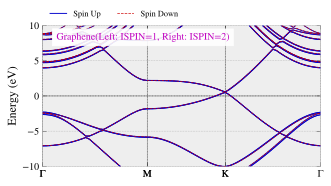

In [ ]:
#nbdev_collapse_input
import matplotlib.pyplot as plt
import pivotpy as pp 
plt.style.use('bmh')
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
shift_kpath=vr1.kpath[-1] # Add last point from first export in second one.
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',shift_kpath=shift_kpath)
last_k=vr2.kpath[-1]
axs=pp.init_figure(figsize=(5,2.6))
K_all=[*vr1.kpath,*vr2.kpath] # Merge kpath for ticks
kticks=[K_all[i] for i in [0,30,60,90,120,150,-1]]
ti_cks=dict(xticks=kticks,xt_labels=['Γ','M','K','Γ','M','K','Γ'])
pp.quick_bplot(path_evr=vr1,ax=axs)
pp.quick_bplot(path_evr=vr2,ax=axs,txt='Graphene(Left: ISPIN=1, Right: ISPIN=2)',ctxt='m')
pp.modify_axes(ax=axs,xlim=[0,last_k],ylim=[-10,10],**ti_cks)

## Interpolation 

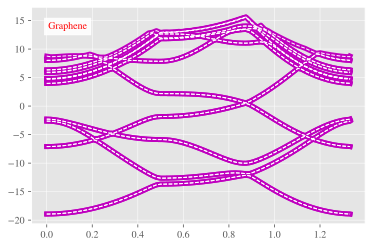

In [ ]:
#collapse_input
import pivotpy as pp
plt.style.use('ggplot')
k=vr1.kpath
ef=vr1.bands.E_Fermi
evals=vr1.bands.evals-ef
#Let's interpolate our graph to see effect. It is useful for colored graphs.
knew,enew=pp.interpolate_data(x=k,y=evals,n=10,k=3)
plot=plt.plot(k,evals,'m',lw=5,label='real data')
plot=plt.plot(k,evals,'w',lw=1,label='interpolated',ls='dashed')
pp.add_text(ax=plt.gca(),txts='Graphene')

## Running powershell commands from python.
Some tasks are very tideious in python while just a click way in powershell. See below, and try to list processes in python yourself to see the difference!

In [ ]:
pp.ps_to_std(ps_command='(Get-Process)[0..4]')

NPM(K)    PM(M)      WS(M)     CPU(s)      Id  SI ProcessName
------    -----      -----     ------      --  -- -----------
50    38.14      61.34     185.53   17860   1 AltC
24    13.38      51.61       2.80   17324   1 ApplicationFrameHost
8     1.59       5.84       0.00    5884   0 armsvc
39    33.12      46.57      10.81   15428   1 BingWallpaperApp
22    42.45      88.01       5.38    2916   1 Code


## Advancaed: Poweshell Cell/Line Magic `%%ps/%ps`
- You can create a IPython cell magic to run powershell commands directly in IPython Shell/Notebook (Powershell core installation required).
- Cell magic can be assigned to a variable `foo` by `%%ps --out foo`
- Line magic can be assigned to a variable by `foo = %ps powershell_command`

Put below code in ipython profile's startup file (create one) "~/.ipython/profile_default/startup/powershell_magic.py"
```python
from IPython.core.magic import register_line_cell_magic
from IPython import get_ipython
@register_line_cell_magic
def ps(line, cell=None):
    if cell:
        return get_ipython().run_cell_magic('powershell',line,cell)
    else:
        get_ipython().run_cell_magic('powershell','--out posh_output',line)
        return posh_output.splitlines()
``` 
Additionally you need to add following lines in "~/.ipython/profile_default/ipython_config.py" file to make above magic work.
```python
from traitlets.config.application import get_config
c = get_config()
c.ScriptMagics.script_magics = ['powershell']
c.ScriptMagics.script_paths = {
    'powershell' : 'powershell.exe -noprofile -command -',
    'pwsh': 'pwsh.exe -noprofile -command -'
}
```

In [ ]:
%%ps 
Get-ChildItem 'E:\Research\graphene_example\'



    Directory: E:\Research\graphene_example


Mode                 LastWriteTime         Length Name                                                                 
----                 -------------         ------ ----                                                                 
da----        10/31/2020   1:30 PM                ISPIN_1                                                              
da----          5/9/2020   1:05 PM                ISPIN_2                                                              
-a----          5/9/2020   1:01 PM          75331 OUTCAR                                                               
-a----        11/22/2020   7:02 PM            162 result.json                                                          
-a----        11/22/2020   6:08 PM            693 sys_info.pickle                                                      
-a----        11/22/2020   6:08 PM          91850 vasprun.pickle                                                

In [ ]:
x = %ps (Get-ChildItem 'E:\Research\graphene_example\').FullName
x

['E:\\Research\\graphene_example\\ISPIN_1',
 'E:\\Research\\graphene_example\\ISPIN_2',
 'E:\\Research\\graphene_example\\OUTCAR',
 'E:\\Research\\graphene_example\\result.json',
 'E:\\Research\\graphene_example\\sys_info.pickle',
 'E:\\Research\\graphene_example\\vasprun.pickle',
 'E:\\Research\\graphene_example\\vasprun.xml']

In [ ]:
#hide
#from nbdev.export import *
#notebook2script()

[Functions Reference](functions.md)

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
